In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

import os

In [38]:
datapath1 = 'D:/Alice/Documents/pyprojects/rodata/scrapyrodata/scrapyrodata/mobs.json'
datapath2 = 'D:/Alice/Documents/pyprojects/rodata/scrapyrodata/scrapyrodata/mobs_pori.json'
datapath3 = 'D:/Alice/Documents/pyprojects/rodata/scrapyrodata/scrapyrodata/mobs_other_pori.json'

In [42]:
df1 = pd.read_json(datapath1, orient='columns')
df2 = pd.read_json(datapath2, orient='columns')
df3 = pd.read_json(datapath3, orient='columns')
df =  pd.concat([df1,df2,df3])
val_cols = list(filter(lambda x: x not in ['files','file_urls', 'checksum'], df.columns.values))
print(len(df))
df = df.drop_duplicates(subset=val_cols, keep='first', inplace=False)
print(len(df))

1279
1278


In [44]:
print(df.describe())
print(df.columns.values)

              Agi  Base Experience          Def          Dex        Earth  \
count  1278.00000     1.278000e+03  1278.000000  1278.000000  1278.000000   
mean     53.70892     1.436330e+05    46.844288    92.306729    85.332551   
std      47.10828     7.213551e+05    75.591896    69.463363    44.239716   
min       0.00000     0.000000e+00     0.000000     0.000000   -25.000000   
25%      20.00000     0.000000e+00     5.000000    50.000000    50.000000   
50%      43.00000     3.125000e+02    21.000000    77.000000   100.000000   
75%      75.00000     4.500000e+03    55.000000   120.000000   100.000000   
max     255.00000     6.700000e+06   667.000000   999.000000   200.000000   

              Fire    Flee(95%)        Ghost            HP    Hit(100%)  \
count  1278.000000  1278.000000  1278.000000  1.278000e+03  1278.000000   
mean     88.673709   236.708138    67.085290  5.119215e+05   145.755086   
std      56.900337    95.827518    45.646558  4.771663e+06    77.317782   
min   

In [45]:
print(df.dtypes)

Agi                  int64
Atk Delay           object
Atk Range           object
Attack              object
Base Exp Per HP     object
Base Experience      int64
Def                  int64
Delay After Hit     object
Dex                  int64
Earth                int64
Fire                 int64
Flee(95%)            int64
Ghost                int64
HP                   int64
Hit(100%)            int64
Holy                 int64
Int                  int64
Job Exp Per HP      object
Job Experience       int64
Level                int64
Luk                  int64
MVP Experience     float64
Magic Def            int64
NAME                object
Neutral              int64
Poison               int64
Property            object
Race                object
Shadow               int64
Sight Range         object
Size                object
Spell Range         object
Str                  int64
Undead               int64
Vit                  int64
Walk Speed          object
Water                int64
W

In [46]:
df['AtkDelay'] = df['Atk Delay'].str.strip('s').replace('n/a', np.nan).apply(pd.to_numeric)
df['AtkRange'] = df['Atk Range'].replace('n/a', np.nan).str.strip(' cells').replace('non-attacker', '0')\
    .apply(pd.to_numeric)
df[['MinAttack','MaxAttack']] = df['Attack'].replace('n/a', np.nan).str.split('-', expand=True).apply(pd.to_numeric)
df['BaseExpPerHP'] = df['Base Exp Per HP'].str.strip(':1').apply(pd.to_numeric)
df['JobExpPerHP'] = df['Job Exp Per HP'].str.strip(':1').apply(pd.to_numeric)
df['DelayAfterHit'] = df['Delay After Hit'].replace('n/a', np.nan).astype('category')

In [47]:
df[['PropertyName','PropertyLevel']] = df['Property'].replace('n/a', np.nan).str.split(' ', expand=True)
df['PropertyName'] = df.PropertyName.astype('category')
df['PropertyLevel'] = df.PropertyLevel.apply(pd.to_numeric)

In [51]:

df['Race'] = df['Race'].replace().replace('n/a', np.nan).astype('category')


0     Demi-Human
1          Demon
2          Demon
3       Formless
4     Demi-Human
5     Demi-Human
6     Demi-Human
7         Dragon
8         Dragon
9         Dragon
10        Dragon
11    Demi-Human
12    Demi-Human
13      Formless
14      Formless
15      Formless
16    Demi-Human
17    Demi-Human
18         Demon
19         Demon
20         Demon
21         Demon
22    Demi-Human
23    Demi-Human
24         Brute
25         Plant
26    Demi-Human
27         Demon
28        Insect
29         Brute
         ...    
11         Plant
12         Plant
13         Plant
14         Plant
15         Plant
16         Plant
17         Plant
18         Plant
19         Plant
20         Plant
21         Plant
22         Plant
23         Plant
0          Plant
1          Plant
2          Plant
3          Plant
4       Formless
5       Formless
6       Formless
7       Formless
8          Plant
9       Formless
10         Plant
11      Formless
12         Plant
13      Formless
14         Dem

ValueError: Invalid dtype for pad_1d [category]

In [52]:

df['Size'] = df['Size'].replace().replace('n/a', np.nan).astype('category')


ValueError: Invalid dtype for pad_1d [category]

In [53]:
df['SightRange'] = df['Sight Range'].replace('n/a', np.nan).str.strip(' cells').apply(pd.to_numeric)
df['SpellRange'] = df['Spell Range'].replace('n/a', np.nan).str.strip(' cells').apply(pd.to_numeric)
df['WalkSpeed'] = df['Walk Speed'].replace('n/a', np.nan).astype('category')


count    1.278000e+03
mean     5.119215e+05
std      4.771663e+06
min      0.000000e+00
25%      2.000000e+03
50%      8.691000e+03
75%      5.535925e+04
max      9.900000e+07
Name: HP, dtype: float64


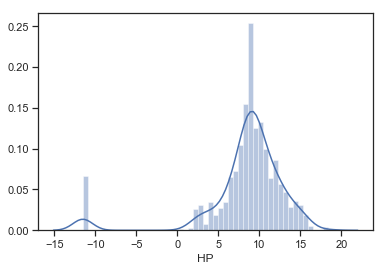

In [54]:
print(df.HP.describe())
sns.distplot(np.log(df.HP+1e-5))


In [55]:

df['logHP'] = np.log(df.HP+1e-5)

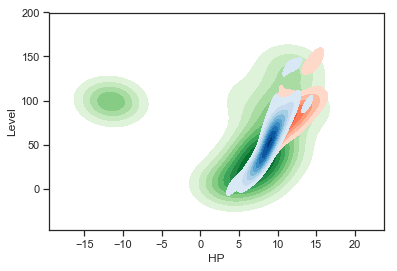

In [56]:

large = df.loc[df.Size == 'Large' ]
medium = df.loc[df.Size == 'Medium' ] 
small = df.loc[df.Size == 'Small' ]

ax = sns.kdeplot(np.log(small.HP+1e-5), small.Level, cmap="Greens", shade=True, shade_lowest=False)
ax = sns.kdeplot(np.log(large.HP+1e-5), large.Level, cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(np.log(medium.HP+1e-5), medium.Level, cmap="Blues", shade=True, shade_lowest=False)

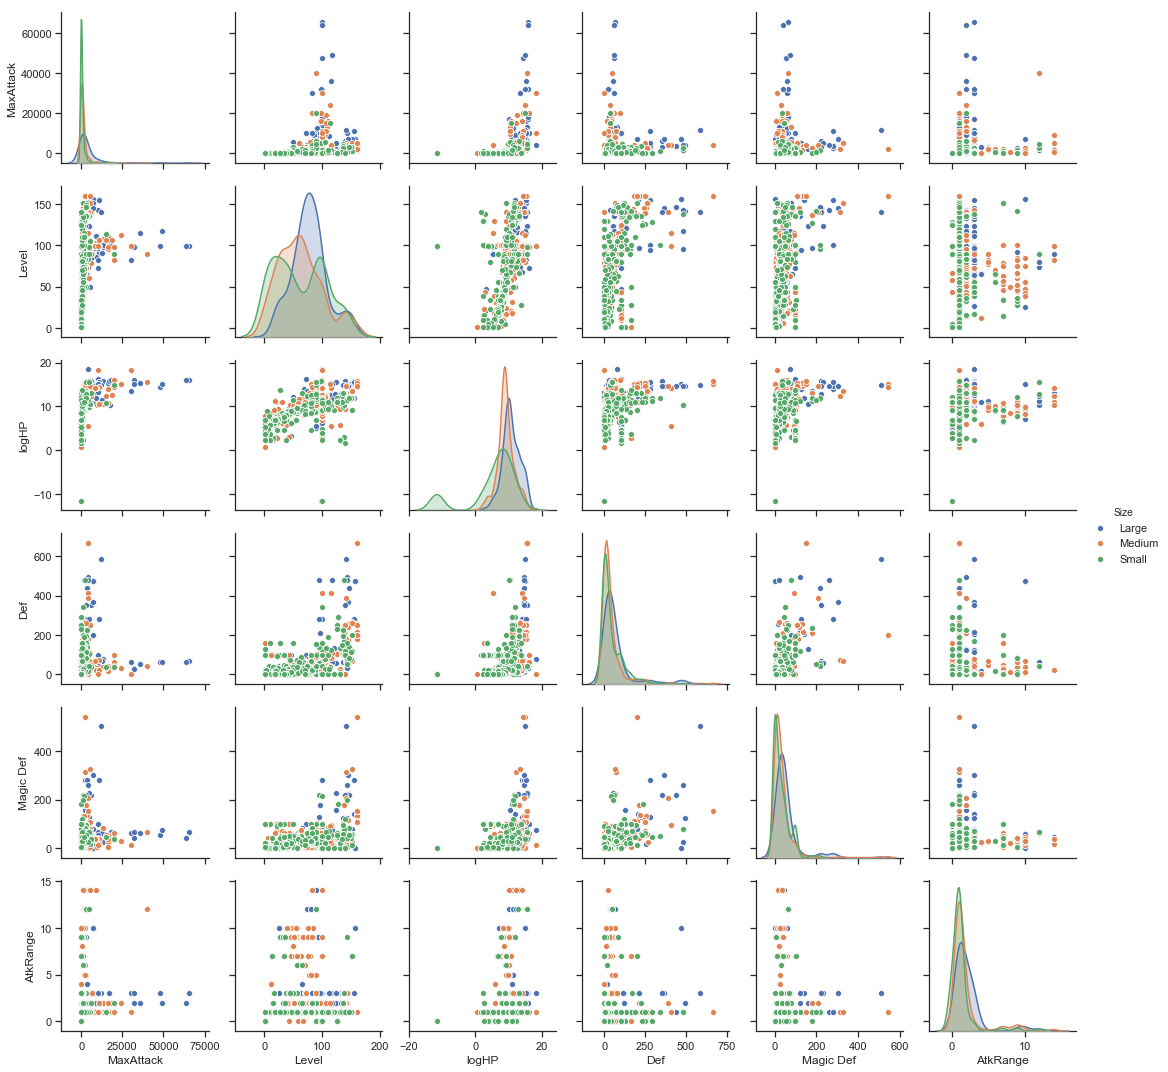

In [57]:
features = ['MaxAttack', 'Level','logHP', 'Def', 'Magic Def', 'Size', 'WalkSpeed', 'AtkRange']
df_featured = df[features]
sns.pairplot(df_featured, hue="Size")


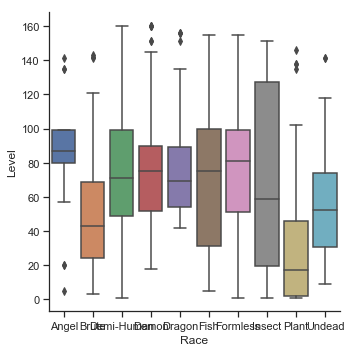

In [58]:

sns.catplot(x="Race", y="Level", kind="box", data=df)


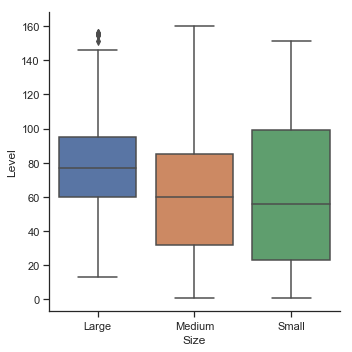

In [59]:
sns.catplot(x="Size", y="Level", kind="box", data=df)


In [19]:
# from matplotlib.pyplot import imshow
# from PIL import Image
# 
# impath = 'D:/Alice/Documents/pyprojects/rodata/scrapyrodata/images/'
# 
# for n,name in zip(df_filtered['files'], df_filtered['name']):
#     #print(n[0]['path'])
#     pil_im = Image.open(impath+n[0]['path'], 'r')
#     pil_im = pil_im.convert('RGB')
#     plt.figure()
#     imshow(np.asarray(pil_im))
#     plt.title(name)


In [72]:
poring_family_list = ['Angeling',
'Archangeling',
'Poring',              
'Deviling',
'Metaling',
'Solid  Metaling',
'Jejeling',
'Magmaring',
'Mastering',
'Metaling',
'Pouring',
'Poporing',
'Pori  Pori / Bring  it',
'Siorava',
'Swift Magmaring',
'Magmaring',   
'Drops',
'Drops Ringleader',
'Marin',
'Ghostering' ]

poring_family_list = ['Angeling',
'Archangeling',
'Poring',
'Bomb  Poring',
'Santa  Poring',                      
'Deviling',
'Metaling',
'Heavy  Metaling',
'Metaling  Ringleader',
'Solid  Metaling',
'Jejeling',
'Magmaring',
'Mastering',
'Metaling',
'Pouring',
'Poporing',
'Pori  Pori',
'Siorava',
'Magmaring',
'Magmaring',   
'Drops',
'Drops Ringleader',
'Marin',
'Ghostering' ]


poring_family_list = ['ANGELING',
'ARCHANGELING',
'PORING',                     
'DEVILING',
'METALING',
'JEJELING',
'MAGMARING',
'MASTERING',
'POURING',
'POPORINNG',
'SIORAVA',
'DROPS',
'MARIN',
'GHOSTRING']

exclude_list = ['MARINA',
                'MARINE']

In [87]:
# df_porings = df[df['name'].isin(poring_family_list)]
# #print(df_porings.NAME.str.contains('MAGMARING'))


df_porings = df[~df['NAME'].str.contains('|'.join(exclude_list))]
df_porings  =df_porings[df_porings['NAME'].str.contains('|'.join(poring_family_list))]

print(len(df_porings))

df_porings.loc[df_porings['name'].str.contains('POPORING_IMMUNE'),'name'] = 'Immune Poporing'
df_porings['name'] = df_porings['name'].str.replace('  ', ' ')

print(list(df_porings.name))
print(df_porings.columns.values)

In [88]:
cols = ['Agi', 'Def', 'Dex','Earth','Fire','Flee(95%)', 'Ghost', 'HP', 'Hit(100%)', 'Holy', 'Int','Level','Luk',
        'Neutral','Poison','Race','Shadow','Size','Str','Undead','Vit','Water','Wind','file_urls','files','id',
        'name','AtkDelay','AtkRange','MinAttack', 'MaxAttack','BaseExpPerHP','JobExpPerHP','DelayAfterHit',
        'PropertyName', 'PropertyLevel','SightRange','SpellRange','WalkSpeed','logHP']

In [92]:
df_porings[cols].to_csv('poring_family.csv', index = False)


In [93]:
df.to_csv('mobs_refined.csv',index = False)